<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/185150400111046_Ahmad_Azmi_Abdurrahim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Proyek Akhir Pengantar Data Saintis**

Nama : Ahmad Azmi Abdurrahim

NIM : 185150400111046

Kelas : Sistem Informasi - B

# **DEKSRIPSI TUJUAN BISNIS**




Sebuah toko retail ingin memasuki pasar yang lebih besar dengan cara menjual sereal. Namun, tentu pemilihan sereal yang dipilih berdasarkan dengan yang kira-kira dapat menguntungkan toko tersebut tanpa memerlikan model yang berlebihan. Untuk itu, diperlukan analisa data dari penjualan serta rating dari berbagai jenis sereal, dan menemukan titik yang menjadi penyebab nilai rating dari sereal tersebut.

#**ANALISA PENDEKATAN YANG AKAN DILAKUKAN**


Analisa pada projek ini menggunakan metode Regresi linear sederhana, yaitu Metode Statistik yang berfungsi untuk menguji sejauh mana hubungan sebab akibat antara Variabel Faktor Penyebab (X) terhadap Variabel Akibatnya. Dimana dalam proyek ini yang menjadi akibat adalah nilai Kalori sereal, dan akibatnya adalah nilai rating dari sereal.

#**PENGUMPULAN DATA**


Data diambil dari repository Kaggle.com, yang dimana merupakan sebuah website open source yang menyediakan repository berbagai Dataset. Setelah mengambil data dari website tersebut, data yang telah di download di upload ke Google Drive, lalu di import ke Google Colab.

In [ ]:
# Mengimport library yang dibutuhkan

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Membaca Data CSV Sereal

data = pd.read_csv("/content/drive/MyDrive/Dataset/cereal.csv")

#**PEMAHAMAN TERHADAP DATA YANG TELAH DIKUMPULKAN**




Dataset cereal.csv yang telah diunduh memiliki 77 baris dan 16 kolom. 

Kolom dan arti dari Dataset cereal.csv yaitu sebagai berikut:
*   Name : Nama Sereal
*   mfr  : Jenis Produksi Sereal
*   type  : Jenis Sereal, C = Cold (Dingin) H = Hot (Panas)
*   calories : Kalori perporsi
*   protein : Berat protein dalam gram
*   fat  : Berat lemak dalam gram
*   sodium : Berat sodium dalam miligram
*   fiber : Serat dalam gram
*   carbo : Berat Karbohidrat dalam gram
*   sugars : Berat gula dalam gram
*   potass : Berat Kalium dalam miligram
*   vitamins : vitamin dan mineral
*   shelf : rak display
*   weight : Berat dalam ors perporsi
*   cups : Jumlah cangkir perporsi
*   rating : Rating Sereal

Jenis-jenis Produksi Sereal (mfr):

*   A = American Home Food Products;
*   G = General Mills
*   K = Kelloggs
*   N = Nabisco
*   P = Post
*   Q = Quaker Oats
*   R = Ralston Purina


















Memahami Data CSV

In [ ]:
# Menampilkan Data

data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
# Mendeskripsikan nilai-nilai dari tiap kolom

data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
# Mendeskripsikan kolom Kalori

data['calories'].describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

In [ ]:
# Mendeskripsikan kolom Rating

data['rating'].describe()

count    77.000000
mean     42.665705
std      14.047289
min      18.042851
25%      33.174094
50%      40.400208
75%      50.828392
max      93.704912
Name: rating, dtype: float64

In [ ]:
# Mencari jumlah data yang berbeda dari tiap kolom

data.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [ ]:
#Menampilkan Keseluruhan data Sereal
data['class']=0
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,class
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,0
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,0
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,0
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,0


#**EKSPLORASI DATA**



Menyederhanakan Data

In [ ]:
# Mengecek data null pada tiap kolom

data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
# Menghapus data yang tidak dibutuhkan

sereal = data.drop(['potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'], axis=1)
rating = data.drop(['protein', 'protein', 'fat', 'sodium',
                    'fiber', 'carbo', 'sugars', 'potass',
                    'vitamins', 'shelf', 'weight', 'cups'], axis=1)

In [ ]:
# Menampilkan data yang sudah dihapus, Menampilkan Kandungan Sereal

sereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8


In [ ]:
# Menampilkan data yang sudah dihapus, Menampilkan Rating dan Kalori

rating.head()

,name,mfr,type,calories,rating
0,100% Bran,N,C,70,68.402973
1,100% Natural Bran,Q,C,120,33.983679
2,All-Bran,K,C,70,59.425505
3,All-Bran with Extra Fiber,K,C,50,93.704912
4,Almond Delight,R,C,110,34.384843


# **PEMODELAN DATA**

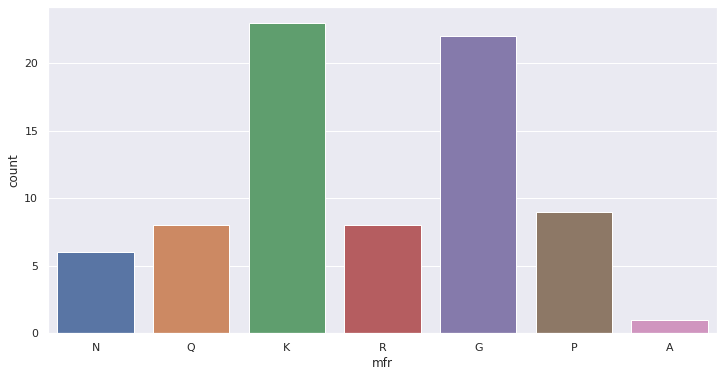

In [ ]:
# Menampilkan Perbandingan antar Jumlah Sereal dari Jenis Produksi Sereal

sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='mfr', data=data)

In [ ]:
# Membuat Korelasi Data

cor1 = sereal.corr()
cor2 = rating.corr()

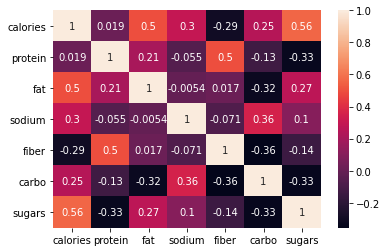

In [ ]:
# Menampilkan Heatmap antara Hubungan satu Kandungan Sereal ke Kandungan yang lainnya

sns.heatmap(cor1, xticklabels=cor1.columns, yticklabels=cor1.columns, annot=True)

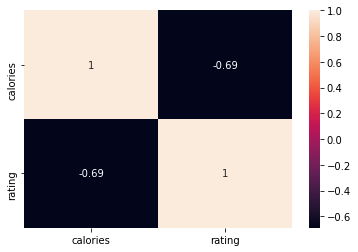

In [ ]:
# Menampilkan Heatmap antara Hubungan rating dengan kalori dari Sereal

sns.heatmap(cor2, xticklabels=cor2.columns, yticklabels=cor2.columns, annot=True)

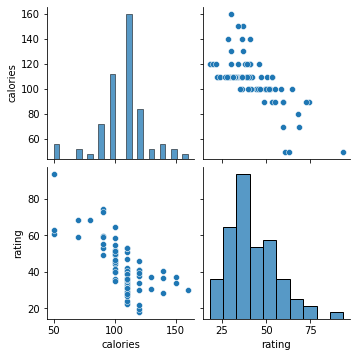

In [ ]:
# Menampilkan Tingkat Perbandingan antar Tingkat kalori dengan rating sereal

sns.pairplot(rating)

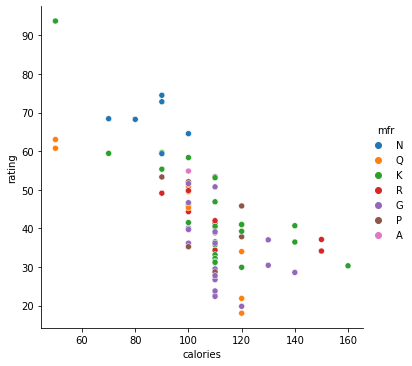

In [ ]:
# Menampilkan Hubungan Perbandingan antara kalori dengan rating sereal per Jenis Produksi Sereal

sns.relplot(x='calories', y='rating', hue = 'mfr', data=rating)

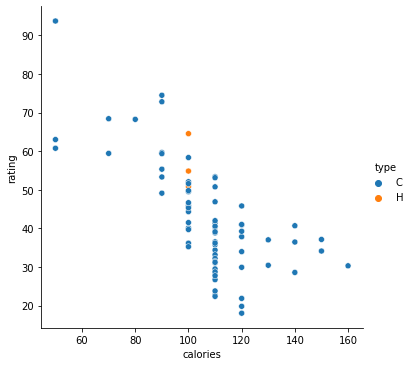

In [ ]:
# Menampilkan Hubungan Perbandingan antara kalori dengan rating sereal per Jenis Penyajian Sereal

sns.relplot(x='calories', y='rating', hue = 'type', data=rating)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


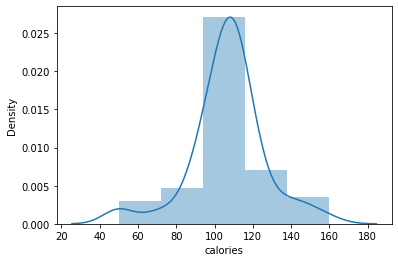

In [ ]:
# Menampilan kepadatan jumlah kalori dari berbagai produk Sereal

sns.distplot(sereal['calories'], bins=5)

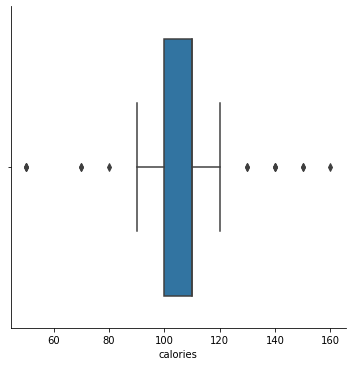

In [ ]:
# Menampilkan jumlah mayoritas dari Kalori produk-produk Sereal

sns.catplot(x='calories', kind= 'box', data=sereal)

# **EVALUASI DATA**

Dari Penelitian proyek yang telah dilakukan, dapat dilihat bahwa mayoritas sereal memiliki kandungan kalori yang berkisaran sekitar 100an, dan hanya beberapa yang memiliki kandungan kalori diatas maupun dibawah angka tersebut.

Jika dilihat dari hubungan antara kalori dengan rating sereal per Jenis Produksi Sereal, bisa dilihat kalau Sereal Produksi Quacker Oats dan Kellogs memiliki jumlah kalori yang paling sedikit. Dan dapat dilihat juga bahwa rating dari kedua Jenis Produksi Sereal tersebut lebih dari rating mean atau rata-rata dari rating Sereal yang sebesar 42.665705.

Sedangkan jika dilihat dari hubungan antara kalori dengan rating sereal per Jenis Produksi Sereal, bisa disimpulkan kalau Sereal yang berjenis Hot memiliki kandungan kalori sebesar 100, sedangkan Jenis Sereal Cold memiliki kandungan kalori yang beragam.

Dari heatmap antara satu kandungan dengan kandungan lainnya, dapat dilihat tingkat kemiripan nilai antar kandungan dari seluruh sereal tidak memiliki kemiripan yang cukup. Sedangkan dalam Heatmap antara Hubungan rating dengan kalori dari Sereal, kemiripan nilai rating dan sereal yaitu sekitar 0.69. Dan pada Tingkat Perbandingan antar Tingkat kalori dengan rating sereal, dilihat bahwa nilai rating tertinggi dipegang oleh Sereal dengan kalori terendah.

Dari penelitan berikut dapat disimpulkan bahwa terdapat hubungan antara kalori dengan rating suatu sereal, namun perhitungan rating tidak hanya diukur dari kalori saja, jadi bukan berarti dengan kalori yang kecil berarti rating Sereal akan menjadi besar, namun kalori juga merupakan poin penting untuk rating suatu Sereal. Jadi untuk proyeksi Penjualan Sereal pada toko ini akan ditentukan berdasarkan tingginya rating dengan kalori yang beragam.